<a href="https://colab.research.google.com/github/Abhishek1923/Edureka_DSML/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

In [ ]:
yf.pdr_override()

In [ ]:
from datetime import datetime

In [ ]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [ ]:
#setting date for 1 year before from now
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


In [ ]:
#downloading stocks of different tech companies from end to start date mentioneed above
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]

In [ ]:
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [ ]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

In [ ]:
#adding data to dataframe
df = pd.concat(company_list, axis=0)

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-18,116.690002,118.599998,116.339996,118.150002,118.150002,73174100,AMAZON
2023-05-19,118.160004,118.309998,115.699997,116.250000,116.250000,54990200,AMAZON
2023-05-22,116.769997,116.769997,114.250000,115.010002,115.010002,70741100,AMAZON
2023-05-23,114.269997,117.139999,113.779999,114.989998,114.989998,67576300,AMAZON
2023-05-24,115.349998,117.339996,115.019997,116.750000,116.750000,63191700,AMAZON


In [ ]:
#Reading the data of specific companies, say we want to read only apple stocks.
apple_stock = df[df['company_name'] == 'APPLE']
apple_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-18,173.000000,175.240005,172.580002,175.050003,175.050003,65496700,APPLE
2023-05-19,176.389999,176.389999,174.940002,175.160004,175.160004,55772400,APPLE
2023-05-22,173.979996,174.710007,173.449997,174.199997,174.199997,43570900,APPLE
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300,APPLE
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,44941700,APPLE


# Cleaning data

In [ ]:
#Reset Index to make sure the columns are available for cleaning and subsequesnt analysis.
df.reset_index(inplace=True)

In [ ]:
#Handling missing values
df.dropna(inplace=True)

In [ ]:
#Adjust Data Types
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#Remove unnecessary columns and adjusting their positioning
df = df[['Date', 'company_name', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]

In [ ]:
print(df.head())

        Date company_name        Open        High         Low       Close  \
0 2022-05-25        APPLE  138.429993  141.789993  138.339996  140.520004   
1 2022-05-26        APPLE  137.389999  144.339996  137.139999  143.779999   
2 2022-05-27        APPLE  145.389999  149.679993  145.259995  149.639999   
3 2022-05-31        APPLE  149.070007  150.660004  146.839996  148.839996   
4 2022-06-01        APPLE  149.899994  151.740005  147.679993  148.710007   

      Volume   Adj Close  
0   92482700  139.685913  
1   90601500  142.926559  
2   90978500  148.751770  
3  103718400  147.956512  
4   74286600  147.827286  


# What was the change in stock price over time?

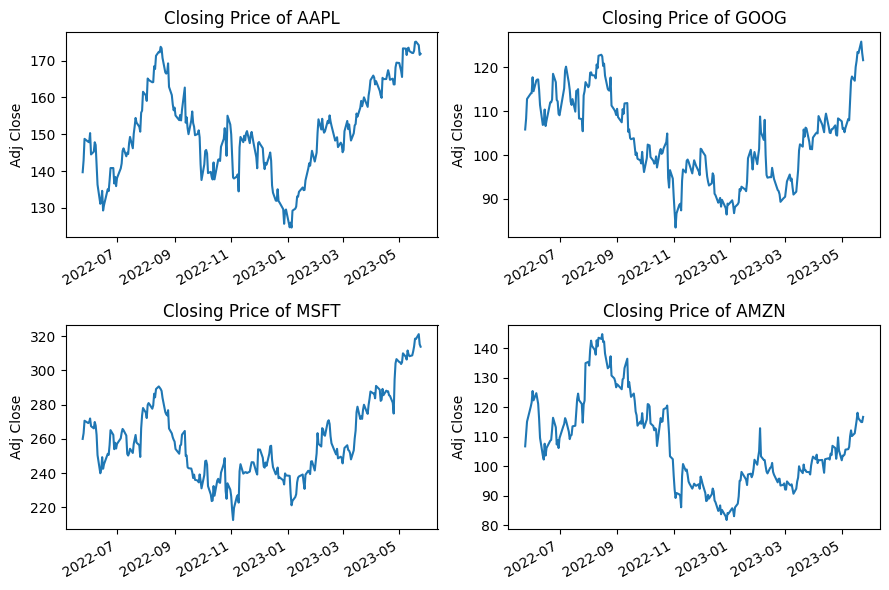

In [ ]:
plt.figure(figsize=(9, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

#Visualize the change in a stock’s volume being traded, over time?

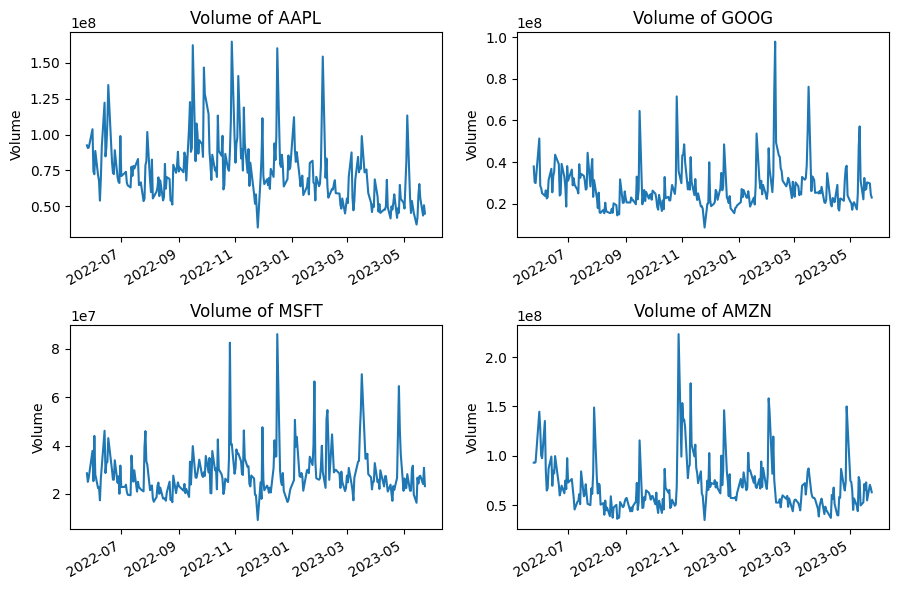

In [ ]:
plt.figure(figsize=(9,6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume of {tech_list[i - 1]}")

plt.tight_layout()

#What was the moving average of various stocks?

()

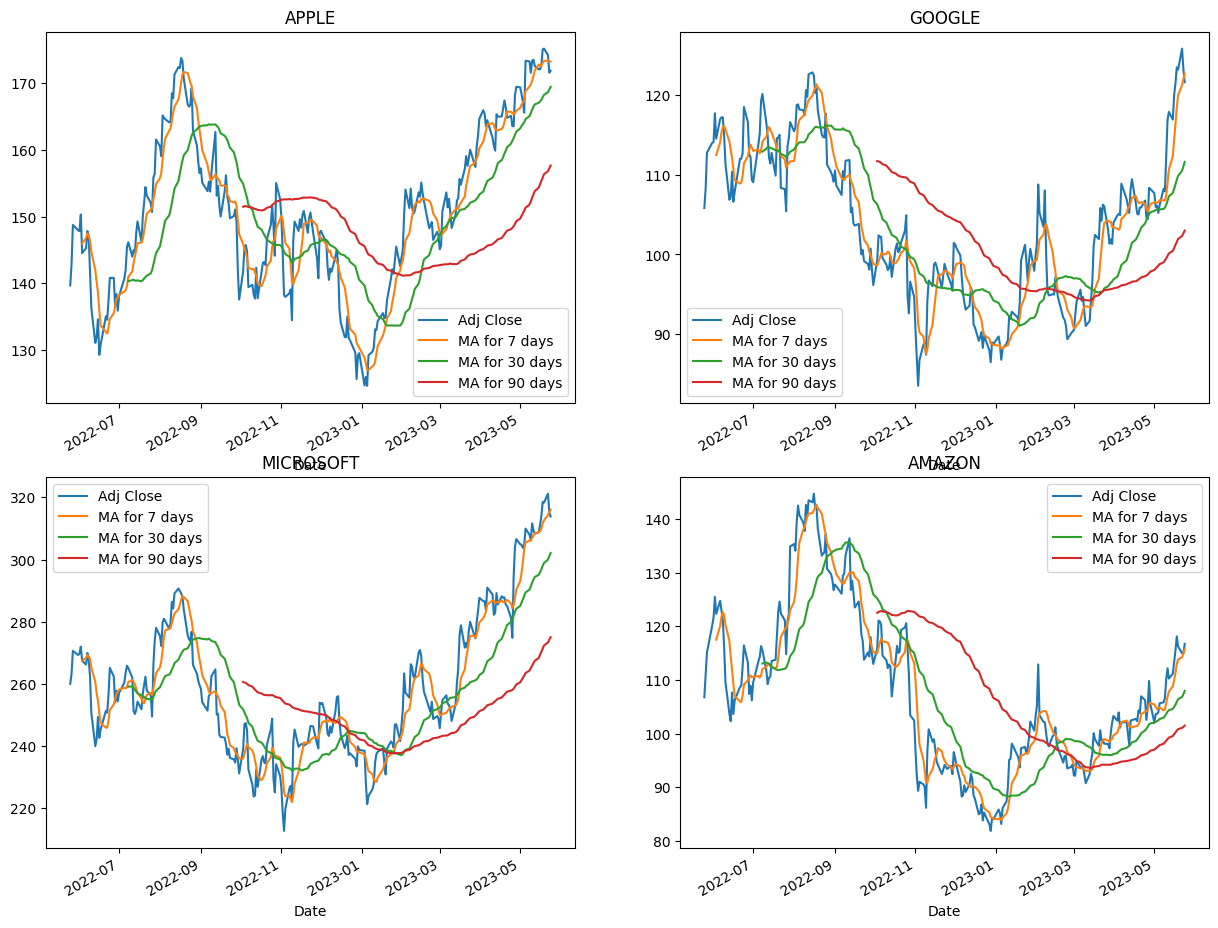

In [ ]:
#we can set the number of days that we want to see the moving average of various stocks
#eg: we want to see the avg of various stocks per week, 1 month and 3 months.
ma_day = [7, 30, 90]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 7 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 7 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 7 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 7 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout

()



#What was the daily return average of a stock?

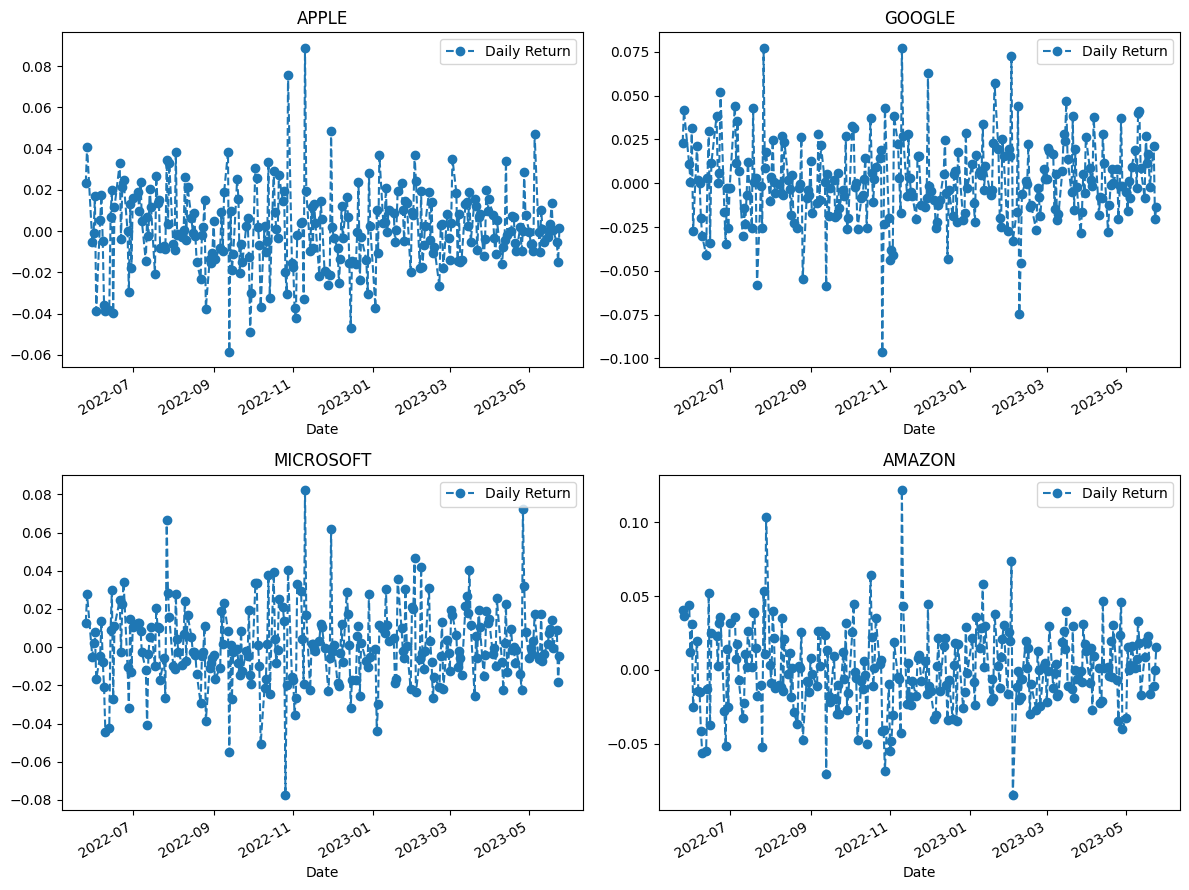

In [ ]:
# using pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# plot of daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(9)
fig.set_figwidth(12)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

#For the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure

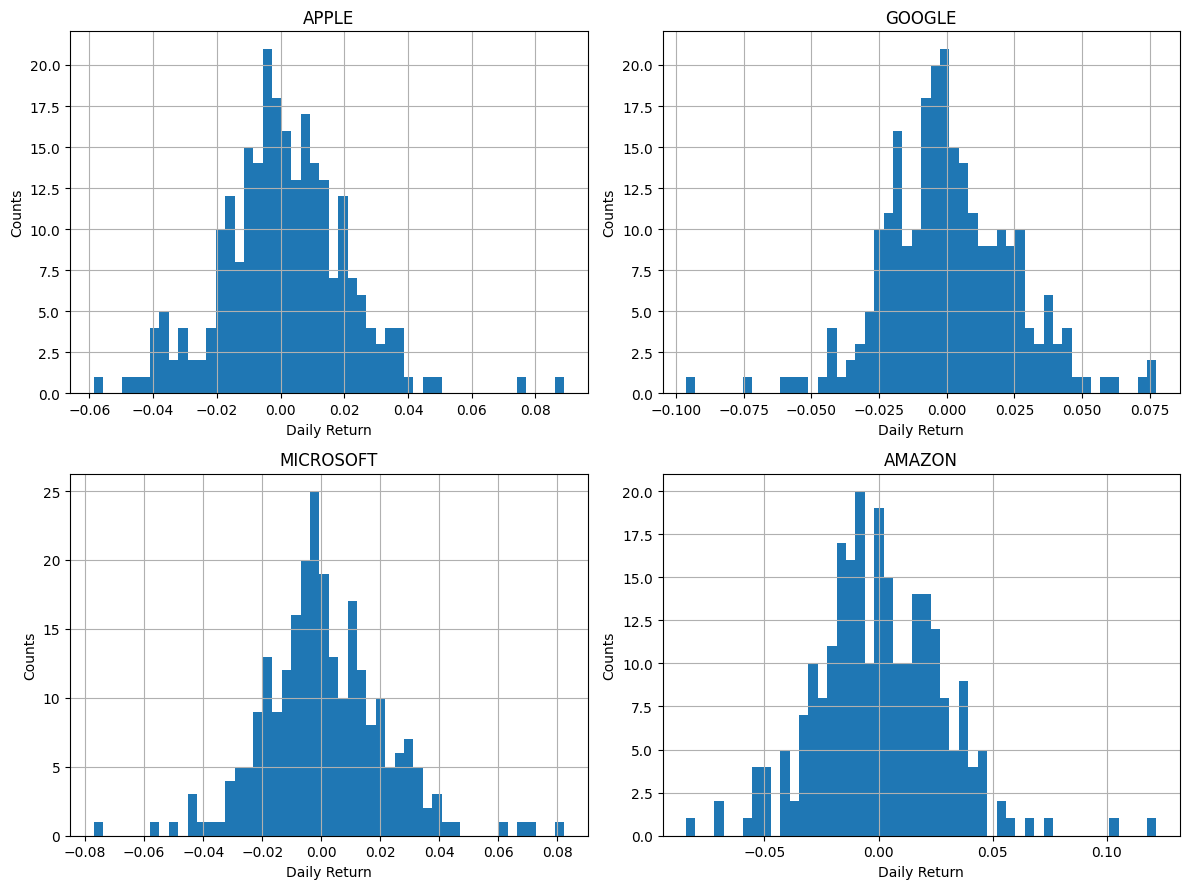

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

#Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [ ]:
# Calculate the daily return using pct_change to find the percent change for each day
df['Daily Return'] = df['Adj Close'].pct_change()

# Add the 'Trend' column based on the daily return
df['Trend'] = np.where(df['Daily Return'] > 0, 'Up', 'Down')

# Display the updated DataFrame
print(df.head())

        Date company_name        Open        High         Low       Close  \
0 2022-05-25        APPLE  138.429993  141.789993  138.339996  140.520004   
1 2022-05-26        APPLE  137.389999  144.339996  137.139999  143.779999   
2 2022-05-27        APPLE  145.389999  149.679993  145.259995  149.639999   
3 2022-05-31        APPLE  149.070007  150.660004  146.839996  148.839996   
4 2022-06-01        APPLE  149.899994  151.740005  147.679993  148.710007   

      Volume   Adj Close  Daily Return Trend  
0   92482700  139.685913           NaN  Down  
1   90601500  142.926559      0.023200    Up  
2   90978500  148.751770      0.040757    Up  
3  103718400  147.956512     -0.005346  Down  
4   74286600  147.827286     -0.000873  Down  


#Visualize trend frequency through a Pie Chart.

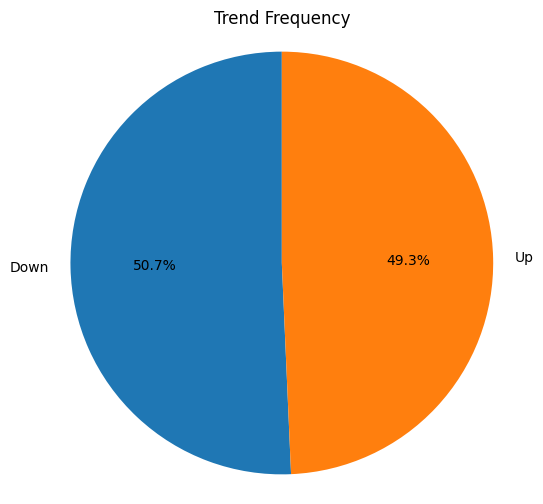

In [ ]:
# Count the frequency of each trend
trend_counts = df['Trend'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Trend Frequency')
plt.axis('equal')

# Display the pie chart
plt.show()


#What was the correlation between the daily returns of different stocks?

In [ ]:
# Select the 'Daily Return' column for each stock
daily_returns = df.pivot(index='Date', columns='company_name', values='Daily Return')

# Compute the correlation matrix
correlation_matrix = daily_returns.corr()

# Display the correlation matrix
print(correlation_matrix)


company_name    AMAZON     APPLE    GOOGLE  MICROSOFT
company_name                                         
AMAZON        1.000000  0.669292  0.876286  -0.687556
APPLE         0.669292  1.000000  0.734055   0.756641
GOOGLE        0.876286  0.734055  1.000000  -0.525695
MICROSOFT    -0.687556  0.756641 -0.525695   1.000000
